# Dimension Reduction

### retrieve [raw, picks, epochs,events.event_ids] data

In [46]:
from pickleshare import PickleShareDB
db = PickleShareDB('./tmp')
raw = db['raw']
originalRaw = db['originalRaw']
epochs = db['epochs']
events = db['events']
picks = db['picks']
events_ids = db['events_ids']

### import necessary packages

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt


## Scatter X,Y data;

In [48]:
X = epochs.get_data(copy=False )
y = epochs.events[:, -1] - 1

In [49]:
labels = {
0: 'do/feet',
1: 'do/hands', 
2: 'imagine/feet',
3: 'imagine/hands',
4: 'rest'
}

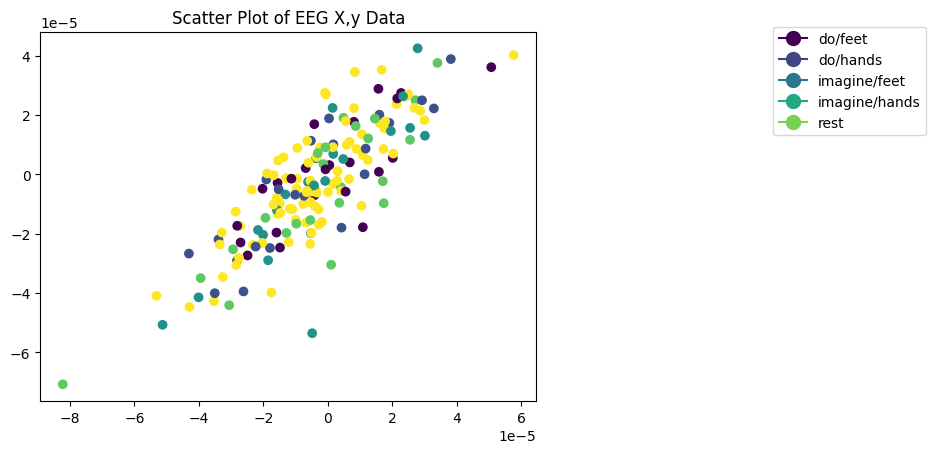

In [58]:
 # Assuming X has shape (epochs, channels, time points)
# Assuming y is your labels (containing label IDs)

# Select the channel and reshape X for scatter plot
channel_index = 0  # Choose the channel you want to plot
X_channel = X[:, channel_index, :]

# Flatten X_channel to have 2D shape for the scatter plot
X_2D = X_channel.reshape((X_channel.shape[0], -1))

# Scatter plot
scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, cmap='viridis')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.title('Scatter Plot of EEG X,y Data')

# Add legend outside the plot frame
legend_labels = list(set(y))  # Unique label IDs
unique_colors = [scatter.cmap(i/len(legend_labels)) for i in range(len(legend_labels))]
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor=color, markersize=10) for color in unique_colors]
plt.legend(legend_handles, [f'{labels[int(label)]}' for label in legend_labels], loc='lower right', bbox_to_anchor=(1.8, 0.7))

plt.show()